# Which Zipcode in King County Has the Most Expensive Sales Price in 2021 on  Average?

## Introduction

House price is an important economic indicator that is closely correlated to important economic variables such as employment rate, wage, inflation, interest rate, and etc. In this case, house price prediction would also allow investors to identify fruitful investment. Thus, the main goal of this project is to build a house price prediction model and predict house price using the model. This project uses the dataset "kc_house_data.csv" from Kaggle.com. It includes sales information of homes sold between May 2014 and May 2015 in King County, including Seattle. The sales information contains price of sales and 19 features (i.e. number of bedroom, view) on 21613 observations. 

To answer the question, Y variable is homes' price of sales in U.S. dollars and the feature- zipcode is used to compare home prices. In addition, to build the price prediction model and to investigate what features make houses in certain zipcodes more expensive, 3 features have been chosen to be X variables- square footage of the homes' interior living space(sqft_living), quality of construction and design(grade), and view. Note that grade is an index from 1 to 13, where 1-3 falls short of building construction and design, 7 is an average level, and 11-13 indicates a high quality level. View is an index from 0 to 4 of how good the view of the property was. The first two features are chosen based on their relatively strong correlation with home's sales price, and view is chosen because King County owns great views that zipcodes with better views might be more popular than other zipcodes.

## Import Data 

In [1]:
# ! pip install qeds
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import qeds
import seaborn as sns
import warnings
%matplotlib inline

# activate plot theme
qeds.themes.mpl_style();

from IPython.display import display

In [2]:
# import and display dataset in dataframe format
data_path = "/Users/cindyxin/Documents/ECO225/ECO225Project/Data/kc_house_data.csv"
data = pd.read_csv(data_path)
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
# information of variables (check for null and type)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
# read all columns
pd.set_option("display.max_columns",21)
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Data Cleaning

In [5]:
# make a copy of data to make changes on
cleaned_data = data.copy()
cleaned_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
# create sales yr in a new column using sales date
from datetime import datetime

cleaned_data["datetime"] = pd.to_datetime(cleaned_data.date)
cleaned_data["yr_sales"] = cleaned_data["datetime"].dt.year

# create renovation dummy for houses renovated
cleaned_data["renovated"] = cleaned_data["yr_renovated"].apply(
    lambda x : 0 if x == 0 else 1)

In [7]:
# drop id, date, zipcode, and yr_renovated
cleaned_data = cleaned_data.drop(["date", "datetime", "id", "yr_renovated"], 
                                 axis = 1)

In [8]:
# quick read over dataset 
cleaned_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sales,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,2014,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,2014,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,2015,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,2014,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,2015,0


In [9]:
# information of variables (check for null and type)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  yr_sal

## Choosing X Variables by Observing Correlation of House Price and Individual Features

In [10]:
# correlation with y variable
corr_matrix = cleaned_data.corr()
corr_matrix['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
renovated        0.126092
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
yr_sales         0.003576
zipcode         -0.053203
Name: price, dtype: float64

The correlation matrix shows that most of the features except for zipcode is positively correlated to the Y variable- price. This is reasonable because zipcode is area code, so it does not have any correlation with price as it increase. Observing the correlation of each feature and price (Y variable), we are going to choose features that are most correlated to price as X variables. These features are sqft_living, and grade. Other than purely observing features with highest correlation, view is also really important in a sense because there are great views in King County that zipcodes with great views may be significantly more popular than zipcodes without great views. Thus, view would also be a X variable.

In [11]:
# new dataframe with chosen X variables and Y variables
cleaned_data1 = cleaned_data[["zipcode", "price", "sqft_living", 
                              "grade", "view"]]
cleaned_data1

,zipcode,price,sqft_living,grade,view
0,98178,221900.0,1180,7,0
1,98125,538000.0,2570,7,0
2,98028,180000.0,770,6,0
3,98136,604000.0,1960,7,0
4,98074,510000.0,1680,8,0
...,...,...,...,...,...
21608,98103,360000.0,1530,8,0
21609,98146,400000.0,2310,8,0
21610,98144,402101.0,1020,7,0
21611,98027,400000.0,1600,8,0


## Summary Statistics

### 1. Data not Grouped by Zipcode

In [12]:
# summary statistics of chosen Xs and Y
print(cleaned_data1.describe())
print()
print(cleaned_data1.std())

            zipcode         price   sqft_living         grade          view
count  21613.000000  2.161300e+04  21613.000000  21613.000000  21613.000000
mean   98077.939805  5.400881e+05   2079.899736      7.656873      0.234303
std       53.505026  3.671272e+05    918.440897      1.175459      0.766318
min    98001.000000  7.500000e+04    290.000000      1.000000      0.000000
25%    98033.000000  3.219500e+05   1427.000000      7.000000      0.000000
50%    98065.000000  4.500000e+05   1910.000000      7.000000      0.000000
75%    98118.000000  6.450000e+05   2550.000000      8.000000      0.000000
max    98199.000000  7.700000e+06  13540.000000     13.000000      4.000000

zipcode            53.505026
price          367127.196483
sqft_living       918.440897
grade               1.175459
view                0.766318
dtype: float64


This data includes 21613 home sales located in 199 different zipcodes in 2014 May - 2015 May, King County. Price of homes ranged from 75,000 U.S.D. to 7,700,000 U.S.D. For all features, means are bigger than medians so they all have a right skewed distribution. Also, the standard deviation of price shows there's a sufficient spread in price, so it is a valid Y variable.

#### Price Distribution

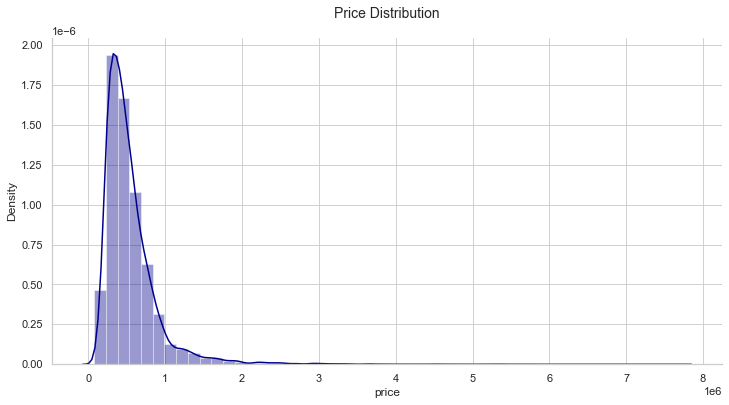

In [30]:
# histogram and kernel density estimation of price
sns.set(style = "whitegrid", rc = {"axes.spines.right": False, 
                                   "axes.spines.top": False})

fig = plt.figure(figsize = (12, 6))

sns.distplot(cleaned_data1.price, color = "darkblue")
plt.title("Price Distribution", fontsize = 14, pad = 20)

plt.show()

# hide warning
warnings.filterwarnings(action = "ignore")

In [14]:
# sales price ranked from high to low 
price_rank = cleaned_data1["price"].sort_values(ascending = False)
price_rank

7252     7700000.0
3914     7062500.0
9254     6885000.0
4411     5570000.0
1448     5350000.0
           ...    
8274       82000.0
16198      81000.0
465        80000.0
15293      78000.0
1149       75000.0
Name: price, Length: 21613, dtype: float64

Together with the summary statistics, the histogram and KDE shows that the distribution of price is right skewed as stated before. This distribution also shows that the maximum price may be a possible outlier, in which may have caused the skew. However, in the sales price rank chart, there are homes sold at prices at the same level as the maximum price. Thus, the maximum price is possibly not an outlier and may be kept in the data.  

#### Sqft_living Distribution

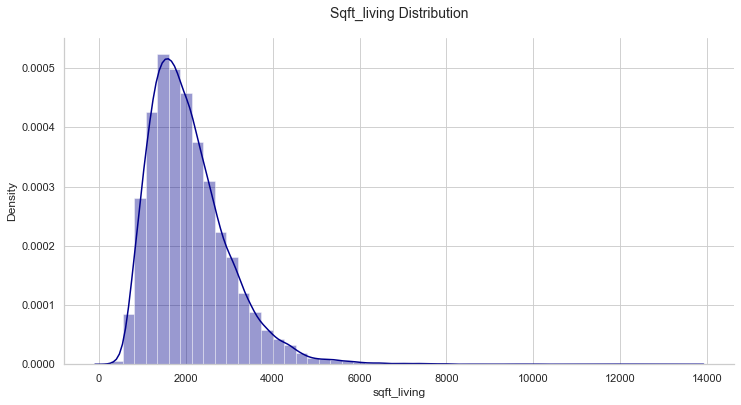

In [15]:
# histogram and kernel density estimation of sqft_living
fig = plt.figure(figsize = (12, 6))

sns.distplot(cleaned_data1.sqft_living, color = "darkblue")
plt.title("Sqft_living Distribution", fontsize = 14, pad = 20)

plt.show()

The distribution of square footage of the homes' interior living space is also right skewed as stated before. 

#### Relation between price and sqft_living

Text(0.5, 1.0, 'Price vs Sqft_living')

<Figure size 1440x1440 with 0 Axes>

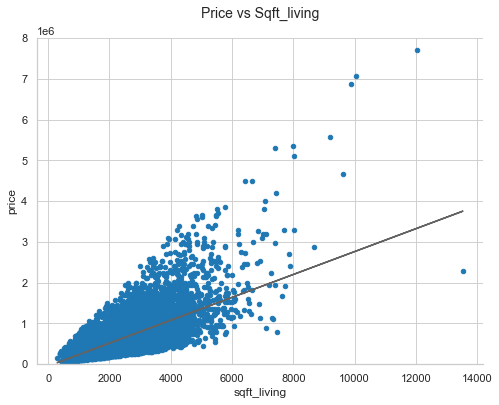

In [16]:
# scatterplot of price vs sqft_living
color1 = plt.cm.Paired(1)
fig = plt.figure(figsize = (20, 20))

cleaned_data1.plot.scatter(x = "sqft_living", y = "price", 
                           ylim = (0,8000000), figsize = (8, 6), 
                           c = np.array(color1).reshape(1,-1))

m, b = np.polyfit(cleaned_data1["sqft_living"], cleaned_data1["price"], 1)
plt.plot(cleaned_data1["sqft_living"], 
         m * cleaned_data1["sqft_living"] + b, c = plt.cm.tab20c(16))

plt.title("Price vs Sqft_living", fontsize = 14, pad = 20)

This is a scatterplot of price vs sqft_living. Although the scatterplot is heteroscedastic, it shows a positive relationship between the square footage of the homes' interior living space and price. As the square footage of the homes' interior living space increases, the price increases as well.  

#### Grade Distribution

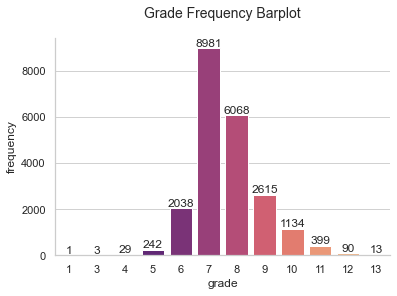

In [17]:
# barplot of grade
grade_bar = sns.countplot(x = cleaned_data1["grade"], data = cleaned_data1, 
                          palette = "magma")
plt.title("Grade Frequency Barplot", fontsize = 14, pad = 20)
plt.xlabel("grade")
plt.ylabel("frequency")
for count in grade_bar.containers:
    grade_bar.bar_label(count,)

plt.show()

This barplot shows that most of the homes have a grade of 6-9 in constrution and design. This is indicates that most of the homes have a medium grade in construction and design. On the other hand, 4 homes have grade 1-3, which indicates poor construction and design. Also, 502 homes have high quality grades of 11-13 in construction and design.

#### Relation between price and grade

Text(0.5, 1.0, 'Price vs Grade')

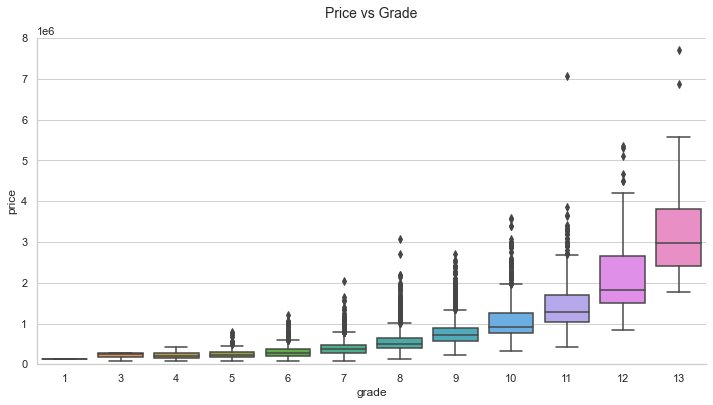

In [18]:
# boxplot of price vs grade
f, ax = plt.subplots(figsize = (12, 6))
fig = sns.boxplot(x = cleaned_data1["grade"], y = cleaned_data1["price"])
fig.axis(ymin = 0, ymax = 8000000)
plt.title("Price vs Grade", fontsize = 14, pad = 20)

This boxplot shows a positive relationship between price and grade. Homes with lower construction and design grade tend to have lower sales price and homes with higher construction and design grade tend to have higher sales price. 

#### View Distribution

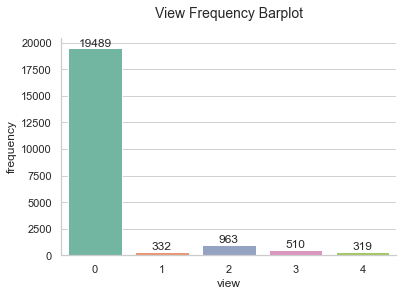

In [19]:
# barplot of view
view_bar = sns.countplot(x = cleaned_data1["view"] , data = cleaned_data1, 
                         palette = "Set2")
plt.title("View Frequency Barplot", fontsize = 14, pad = 20)
plt.xlabel("view")
plt.ylabel("frequency")
for count in view_bar.containers:
    view_bar.bar_label(count,)
 
plt.show()

Combining with the summary table, this barplot of grade of view shows that most of the homes sold have 0 as view grade. Only a small portion of homes have great views. 

#### Relation between price and view 

Text(0.5, 1.0, 'Price vs View')

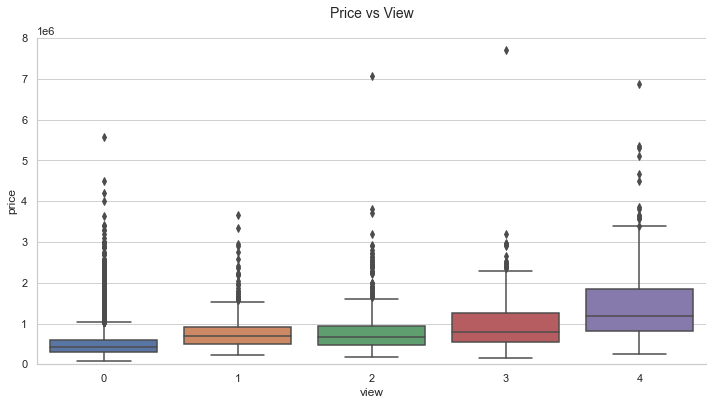

In [20]:
# boxplot of price vs view
f, ax = plt.subplots(figsize = (12, 6))
fig = sns.boxplot(x = cleaned_data1["view"], y = cleaned_data1["price"])
fig.axis(ymin = 0, ymax = 8000000)
plt.title("Price vs View", fontsize = 14, pad = 20)

This is a boxplot of price vs view. Like the other features, view also has a positive but relatively weak relationship with price. Thus, houses with better views tend to have high sales price. 

Notice that there are several outliers in this graph, but these outliers may exist because these homes are possibly better in other features. Thus, it is still possible that homes without higher scores would have high sales price aswell. 

### 2. Data Grouped by Zipcode

In [21]:
# dataset group by zipcode 
group = cleaned_data1.groupby("zipcode")

#### Price grouped by zipcode

In [22]:
# 2014-2015 average sales price of homes in different 
# zipcodes ranked by zipcode.
zipcode_mean_price = group["price"].mean()
zipcode_price_rank = zipcode_mean_price.sort_values(ascending = False)
zipcode_price_rank.reset_index()

,zipcode,price
0,98039,2.160607e+06
1,98004,1.355927e+06
2,98040,1.194230e+06
3,98112,1.095499e+06
4,98102,9.012583e+05
...,...,...
65,98148,2.849086e+05
66,98001,2.808047e+05
67,98032,2.512962e+05
68,98168,2.403284e+05


Text(0, 0.5, 'price')

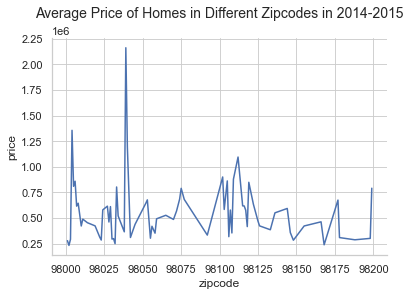

In [23]:
# price plot
cleaned_data1.groupby("zipcode")["price"].mean().plot()
plt.title("Average Price of Homes in Different Zipcodes in 2014-2015", 
          fontsize = 14, pad = 20)
plt.xlabel("zipcode")
plt.ylabel("price")

Both the table and the plot shows that in 2014-2015, homes in zipcode 98039 have the most expensive sales price on average. This area is located by Lake Washington. Also, other homes with zipcodes that have high ranked sales price tend to be located by bodies of water aswell.

#### Sqft_living grouped by zipcode

In [24]:
# 2014-2015 average square footage of the apartments' interior 
# living space in different zipcodes ranked by zipcode.
zipcode_mean_sqft_living = group["sqft_living"].mean()
zipcode_sqft_living_rank = zipcode_mean_sqft_living.sort_values(
    ascending = False)
zipcode_sqft_living_rank.reset_index()

,zipcode,sqft_living
0,98039,3800.900000
1,98040,3106.833333
2,98075,3016.370474
3,98004,2909.022082
4,98006,2888.295181
...,...,...
65,98148,1610.526316
66,98107,1579.548872
67,98126,1543.596045
68,98106,1487.883582


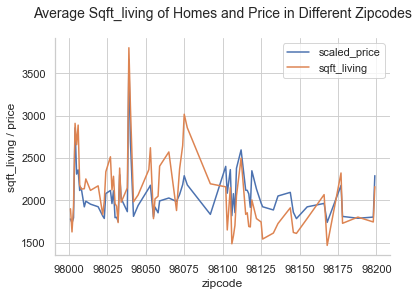

In [25]:
# scaled_price plot
cleaned_data1["scaled_price"] = cleaned_data1["price"]/1000+1500
cleaned_data1.groupby("zipcode")["scaled_price"].mean().plot()

# sqft_living plot
cleaned_data1.groupby("zipcode")["sqft_living"].mean().plot()

# label plot
plt.title("Average Sqft_living of Homes and Price in Different Zipcodes", 
          fontsize = 14, pad = 20)
plt.xlabel("zipcode")
plt.ylabel("sqft_living / price")

# legend
plt.legend(["scaled_price", "sqft_living"], loc ="upper right")

The ranked table of 2014-2015 average square footage of the apartments' interior living space in different zipcodes is ranked by zipcode. Some of the zipcodes' rank in area of interior living space do not vary by much than their rank in price. 

Same thing has been shown in the plot, in which compares the pattern of average interior area to the pattern of scaled average sales price in each zipcode. The plot shows there's a similar pattern in the two variables. The two variables' peaks tend to appear on the same zipcodes. This also shows a positive relationship between price and interior area.

#### Grade grouped by zipcode

In [26]:
# 2014-2015 average grade on quality of construction and design of 
# homes in different zipcodes ranked by zipcode.
zipcode_mean_grade = group["grade"].mean()
zipcode_grade_rank = zipcode_mean_grade.sort_values(ascending = False)
zipcode_grade_rank.reset_index()

,zipcode,grade
0,98039,9.560000
1,98075,9.008357
2,98040,8.960993
3,98006,8.795181
4,98077,8.782828
...,...,...
65,98106,6.865672
66,98146,6.822917
67,98178,6.816794
68,98002,6.693467


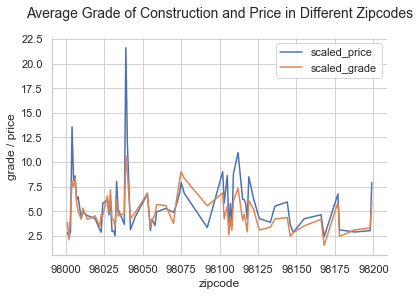

In [27]:
# scaled_price plot
cleaned_data1["scaled_price"] = cleaned_data1["price"]/100000
cleaned_data1.groupby("zipcode")["scaled_price"].mean().plot()

# scaled_grade plot
cleaned_data1["scaled_grade"] = cleaned_data1["grade"]*3-18
cleaned_data1.groupby("zipcode")["scaled_grade"].mean().plot()

# label plot
plt.title("Average Grade of Construction and Price in Different Zipcodes", 
          fontsize = 14, pad = 20)
plt.xlabel("zipcode")
plt.ylabel("grade / price")

# legend
plt.legend(["scaled_price", "scaled_grade"], loc ="upper right")

The ranked table of 2014-2015 average grade of construction and design in different zipcodes is ranked by zipcode. The ranked table does not vary by much than the ranked table of price. Some of the zipcodes' rank in grade of construction and design do not vary by much than their rank in price. 

The plot, in which compares the pattern of scaled average grade of construction and design to the pattern of scaled average sales price in each zipcode, also shows similarity between the two variables. The two patterns are similar in shape. The peaks of the two variables tend to appear on the same zipcodes. This shows a positive relationship between price and grade of construction and design.

#### View grouped by zipcode

In [28]:
# 2014-2015 average grade on view of homes in different zipcodes 
# ranked by zipcode.
zipcode_mean_view = group["view"].mean()
zipcode_view_rank = zipcode_mean_view.sort_values(ascending = False)
zipcode_view_rank.reset_index()

,zipcode,view
0,98070,1.084746
1,98177,0.815686
2,98040,0.783688
3,98166,0.665354
4,98006,0.634538
...,...,...
65,98168,0.014870
66,98077,0.010101
67,98002,0.010050
68,98031,0.007299


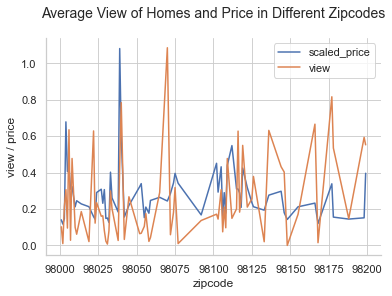

In [29]:
# scaled_price plot
cleaned_data1["scaled_price"] = cleaned_data1["price"]/2000000
cleaned_data1.groupby("zipcode")["scaled_price"].mean().plot()

# view plot
cleaned_data1.groupby("zipcode")["view"].mean().plot()

# label plot
plt.title("Average View of Homes and Price in Different Zipcodes", 
          fontsize = 14, pad = 20)
plt.xlabel("zipcode")
plt.ylabel("view / price")

# legend
plt.legend(["scaled_price", "view"], loc ="upper right")

The ranked table of 2014-2015 average grade of view in different zipcodes is ranked by zipcode. This ranked table does not show much similarity to the ranked table of price. However, observations could be made by observing the plot. 

The plot, which compares the pattern of average grade of view to the pattern of scaled average sales price in each zipcode, does not show much similarity in pattern of the two variables. However, some peaks of view does appear on zipcodes that have peaks in scaled price aswell. Thus in general, although this plot does not show much similarity in patterns of price and view, there still exists some similarity in the two variables. This indicates that there exists a relatively weak positive relationship between view and price. 

One important thing to notice is that in 2014-2015, homes in zipcode 98039 have the biggest square footage of the homes' interior living space. At the same time, this zipcode also has the best average grade on quality of construction and design, and the zipcode is on average the most expensive zipcode in the time period. This leads to a hypothesis of that this zipcode may aswell be the most expensive zipcode in 2021. 